We will be going over the example of steering a mobile robot in Section 9.10 (page 178) of the book. 

In that example, we are given a robot that moves in 2 directions, x and y. We denote the position of the robot at time k as $p_k=\begin{bmatrix}p^x_k\\p^y_k \end{bmatrix}$. Given a current state of the robot and an input (either torque from motors or an external force), we can determine the next state of the robot as . 
\begin{align*}
p_{k+1}=Ap_k+Bu_k
\end{align*}
For this example, we are given that
\begin{align*}
\delta t &=0.1\\
A&=I_{2 \times 2} +\delta t \begin{bmatrix}
0.0 & -0.5 \\0.5 & 0.0
\end{bmatrix}\\
B&=\delta t I_{2 \times 2}
\end{align*}
Don't worry too much about where these equations come from. We will cover this when we talk about project 3.  Note that to make the equations appropriate for a computer, we discretize time by defining $t_k :=k\delta t$

Having the model of the robot allows us to predict the future behavior of the robot.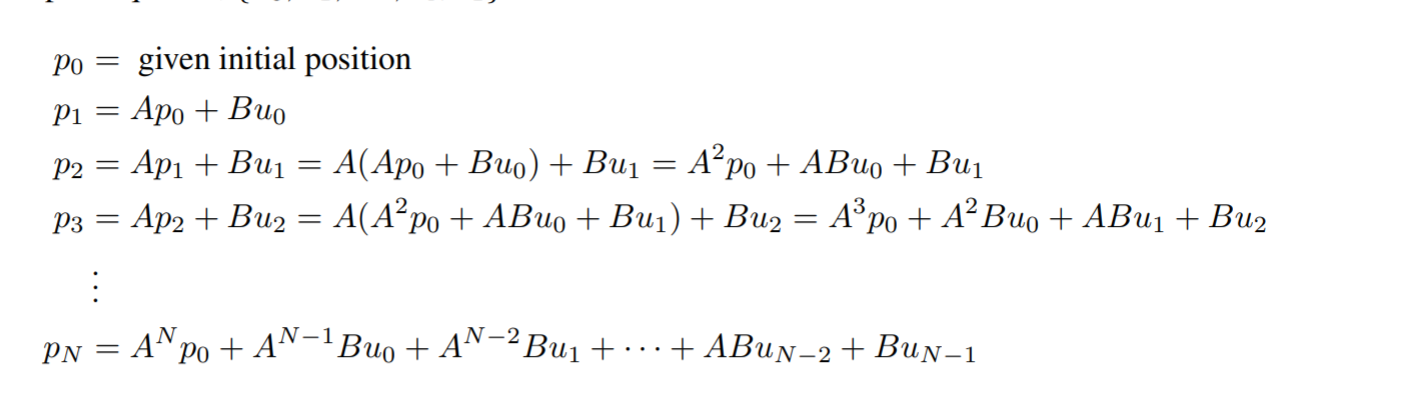

For instance, if we want to figure out the control sequence that gets us from the initial position $p_0$ to the final position $p_N$, we can do the following: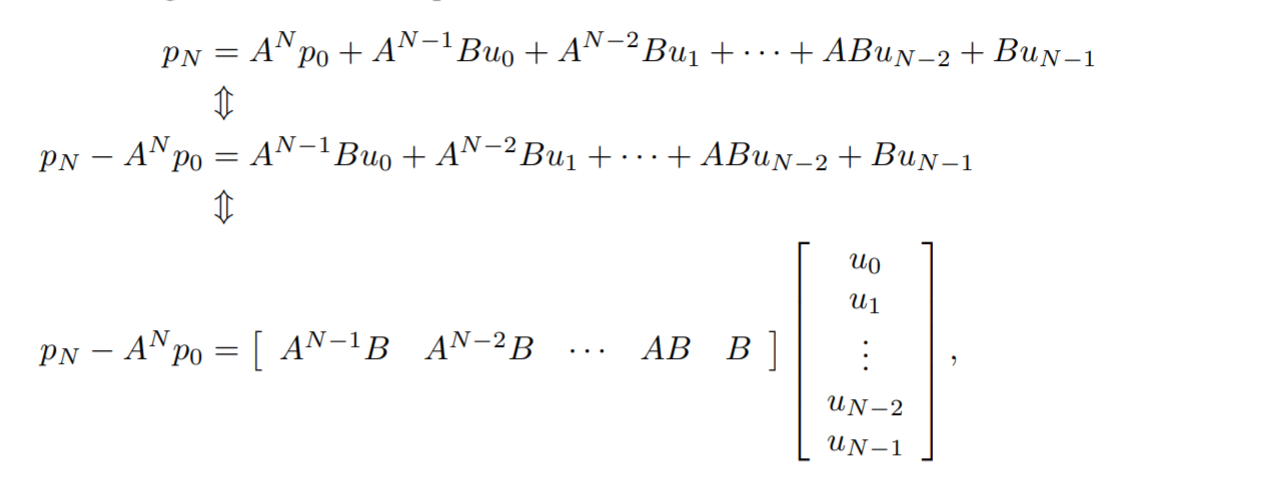

We can rewrite this as $p_N-Sp_0=Mu_{seq}$ where <br> $\begin{align}
\label{eq:CompactFormula01}
S&:= A^N \\
\label{eq:CompactFormula02}
M &:=\left[\begin{array}{ccccc} A^{N-1} \cdot B  & A^{N-2} \cdot B & \cdots & A\cdot B & B \end{array} \right]\\
\label{eq:CompactFormula3}
u_{\rm seq}&:=\left[\begin{array}{c} u_0 \\ u_1 \\  \vdots \\ u_{N-2} \\ u_{N-1}, \end{array} \right]
\end{align}$


Let's now solve for the control sequence that will take us from $p_0=\begin{bmatrix}1.0\\1.0\end{bmatrix}$ to $p_N=\begin{bmatrix}0.0\\0.0 \end{bmatrix}$ where $N=20$. Since we have 2 control inputs, we have $2N=40$ unknowns and only two equations. Therefore, we have an underdetermined problem!

### Checkpoint
What are some ways we can solve an underdetermined system of equations?

As discussed in Section 9.9 of the text book, given an underdetermined system of equations $Ax=b$ where the rows of $A$ are linearly independent, $x^*$ which is the solution of the smallest norm is:

\begin{equation} x^*=_{Ax=b}min || x || \iff x^*=A^\intercal(AA^\intercal)^{-1}b \iff x^*=Q\beta \: \text{and}\: R^\intercal \beta=b    \end{equation} (4.2)

where $Q$ and $R$ are the QR factorization matrices of $A^\intercal$ : $A^\intercal=Q R$

In [12]:
function forwardsub(L, b)    
    (nr,nc) = size(L)
    x = Vector{Float64}(undef,nc)
    if minimum(abs.(diag(L))) < 1e-8
        println("L is close to singular. I will not solve this problem")
        return x
    else    
        x[1] = b[1] / L[1,1]
        for i = 2:nc
            x[i]=( b[i] - L[i,1:i-1]' * x[1:i-1] ) ./ L[i,i]
        end
        return x  
    end
end


function minNormUnderdetermined(A,b)
    # Solves for minimum norm x in Ax = b 
    # using the QR factorization and forward substitution. Returns xStar.
    # xStar = arg min x' x
    #  subject to  Ax = b
    if((size(A,1)>size(A,2))||(size(A,1)!=size(b,1)))
        println("Given system of equations is not underdetermined, check the sizes of your inputs!")
        return
    end
    F = qr(A')
    Q = Matrix(F.Q)
    R = Matrix(F.R)
    beta = forwardsub(R', b) 
    xStar =Q*beta
    return xStar
end

minNormUnderdetermined (generic function with 1 method)

Let's get started! We'll first define the dynamics

In [2]:
using Random
using LinearAlgebra
# Run me, don't change me
# Model of our mobile robot
dt=0.1
@show B = zeros(2,2) + dt*I
@show A = I + dt*[0 -0.5; 0.5 0.0]

B = zeros(2, 2) + dt * I = [0.1 0.0; 0.0 0.1]
A = I + dt * [0 -0.5; 0.5 0.0] = [1.0 -0.05; 0.05 1.0]


2×2 Matrix{Float64}:
 1.0   -0.05
 0.05   1.0

In [5]:
display(B)


2×2 Matrix{Float64}:
 0.1  0.0
 0.0  0.1

In [6]:
display(A)

2×2 Matrix{Float64}:
 1.0   -0.05
 0.05   1.0

In [7]:
p0=[1.0;1.0]
pN=[0.0;0.0]
N=20;

In [16]:
#Define the S and M matrices
S=
M=

display(S)
display(M)

2×0 Matrix{Float64}

In [13]:
u_seq=minNormUnderdetermined(,)

40-element Vector{Float64}:
 -0.4863514550089915
 -0.5375463450099383
 -0.4583283169660795
 -0.5604627608582421
 -0.4292320986764762
 -0.5819243657920659
 -0.3991380352986264
 -0.6018812675569972
 -0.3681236627638669
 -0.6202874506951906
 -0.33626861868240127
 -0.6371008816293108
 -0.30365443850467405
  ⋮
 -0.025654867241122765
 -0.7118873934069359
  0.009914715640123735
 -0.7113916576249296
  0.04537087134301269
 -0.7091231140577792
  0.08062546338743308
 -0.7050918408884074
  0.11559107773750966
 -0.6993122870015318
  0.150181238990111
 -0.6918032250520263